In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "lug_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [2]:
df

,buying,maint,doors,persons,lug_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
print df.shape[0], df.shape[1]

1728 7


In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,eval
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [5]:
# [Mission 1] 모든 속성들을 수치형 데이터로 변환

map_dic = {}
for i in all_names:
    unique_array = df[i].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]] = j
    df[i] = df[i].map(map_dic[i])    
df

,buying,maint,doors,persons,lug_boot,safety,eval
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
5,0,0,0,0,1,2,0
6,0,0,0,0,2,0,0
7,0,0,0,0,2,1,0
8,0,0,0,0,2,2,0
9,0,0,0,1,0,0,0


In [6]:
map_dic

{'buying': {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
 'eval': {'acc': 1, 'good': 3, 'unacc': 0, 'vgood': 2},
 'lug_boot': {'big': 2, 'med': 1, 'small': 0},
 'maint': {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 'persons': {'2': 0, '4': 1, 'more': 2},
 'safety': {'high': 2, 'low': 0, 'med': 1}}

In [7]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,eval
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.417245
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.747188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [8]:
# [Mission 2] Target 4개별로 그룹핑하여 각 속성별 기본 통계치 및 Box Plot 산출

df_uacc = df[df['eval'] == 0]
df_acc = df[df['eval'] == 1]
df_good = df[df['eval'] == 3]
df_vgood = df[df['eval'] == 2]

In [9]:
df_uacc.describe()

,buying,maint,doors,persons,lug_boot,safety,eval
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210
mean,1.350413,1.366942,1.454545,0.790083,0.932231,0.752893,0
std,1.118099,1.127547,1.127152,0.835859,0.819754,0.802763,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
75%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,0


C:\Users\Saetbyeol\AppData\Local\Enthought\Canopy\User\lib\site-packages\pandas\tools\plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


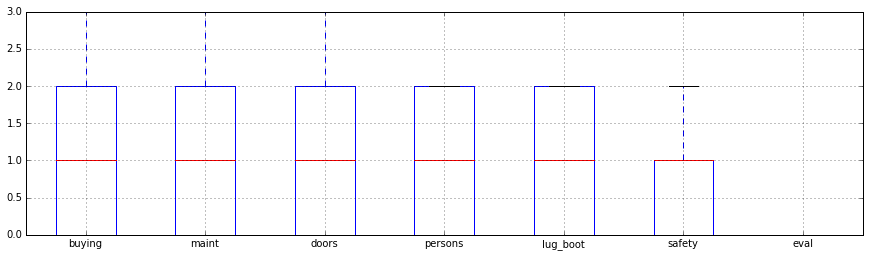

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_uacc.boxplot(ax=ax)
plt.show()

In [11]:
df_acc.describe()

,buying,maint,doors,persons,lug_boot,safety,eval
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384
mean,1.575521,1.591146,1.585938,1.484375,1.101562,1.531250,1
std,1.041953,1.048199,1.094925,0.500408,0.799868,0.499674,0
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1
50%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1
75%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1


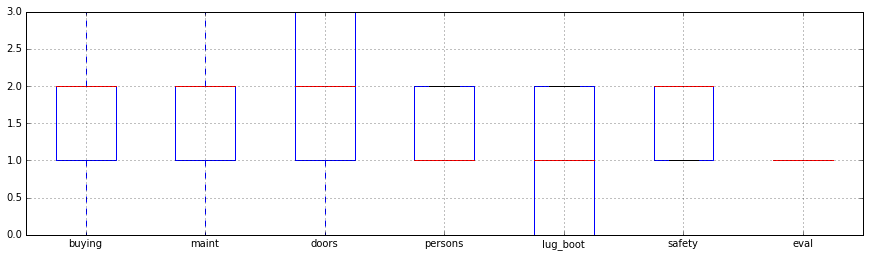

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_acc.boxplot(ax=ax)
plt.show()

In [13]:
df_good.describe()

,buying,maint,doors,persons,lug_boot,safety,eval
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69
mean,2.666667,2.666667,1.565217,1.478261,1.043478,1.434783,3
std,0.474858,0.474858,1.104513,0.503187,0.812309,0.499360,0
min,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,3
25%,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,3
50%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3


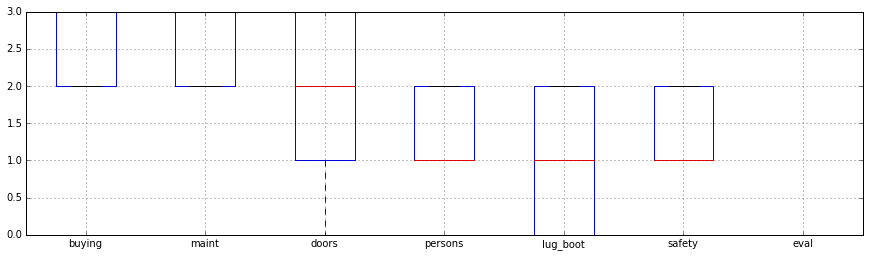

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_good.boxplot(ax=ax)
plt.show()

In [15]:
df_vgood.describe()

,buying,maint,doors,persons,lug_boot,safety,eval
count,65.00000,65.000000,65.000000,65.000000,65.000000,65,65
mean,2.60000,2.200000,1.769231,1.538462,1.615385,2,2
std,0.49371,0.754155,1.057255,0.502398,0.490290,0,0
min,2.00000,1.000000,0.000000,1.000000,1.000000,2,2
25%,2.00000,2.000000,1.000000,1.000000,1.000000,2,2
50%,3.00000,2.000000,2.000000,2.000000,2.000000,2,2
75%,3.00000,3.000000,3.000000,2.000000,2.000000,2,2
max,3.00000,3.000000,3.000000,2.000000,2.000000,2,2


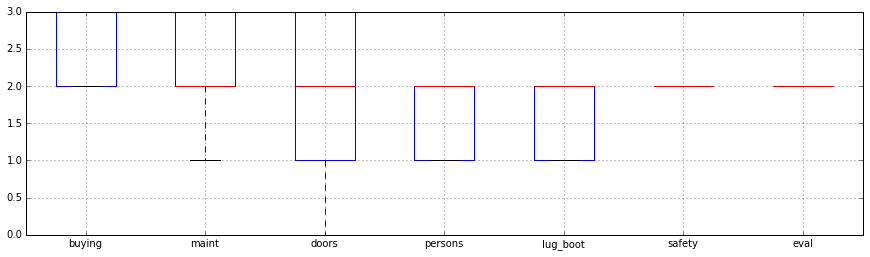

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_vgood.boxplot(ax=ax)
plt.show()

In [17]:
# [Mission 3] 각 속성들을 두 개씩 쌍을 지어서 각 쌍마다 Scatter Plot 그리기

o_list = ['data_x', 'data_y', 'label_x', 'label_y', 'ylim_min', 'ylim_max']

options = {}
for i in range(0,15) :
    options[i] = {}
    
t = 0
for i in range(0,5) :
    for j in range(i+1, 6) :
        options[t][o_list[0]] = feature_names[i]
        options[t][o_list[1]] = feature_names[j]
        options[t][o_list[2]] = feature_names[i]
        options[t][o_list[3]] = feature_names[j]
        t += 1

In [18]:
options

{0: {'data_x': 'buying',
  'data_y': 'maint',
  'label_x': 'buying',
  'label_y': 'maint'},
 1: {'data_x': 'buying',
  'data_y': 'doors',
  'label_x': 'buying',
  'label_y': 'doors'},
 2: {'data_x': 'buying',
  'data_y': 'persons',
  'label_x': 'buying',
  'label_y': 'persons'},
 3: {'data_x': 'buying',
  'data_y': 'lug_boot',
  'label_x': 'buying',
  'label_y': 'lug_boot'},
 4: {'data_x': 'buying',
  'data_y': 'safety',
  'label_x': 'buying',
  'label_y': 'safety'},
 5: {'data_x': 'maint',
  'data_y': 'doors',
  'label_x': 'maint',
  'label_y': 'doors'},
 6: {'data_x': 'maint',
  'data_y': 'persons',
  'label_x': 'maint',
  'label_y': 'persons'},
 7: {'data_x': 'maint',
  'data_y': 'lug_boot',
  'label_x': 'maint',
  'label_y': 'lug_boot'},
 8: {'data_x': 'maint',
  'data_y': 'safety',
  'label_x': 'maint',
  'label_y': 'safety'},
 9: {'data_x': 'doors',
  'data_y': 'persons',
  'label_x': 'doors',
  'label_y': 'persons'},
 10: {'data_x': 'doors',
  'data_y': 'lug_boot',
  'label_x': 

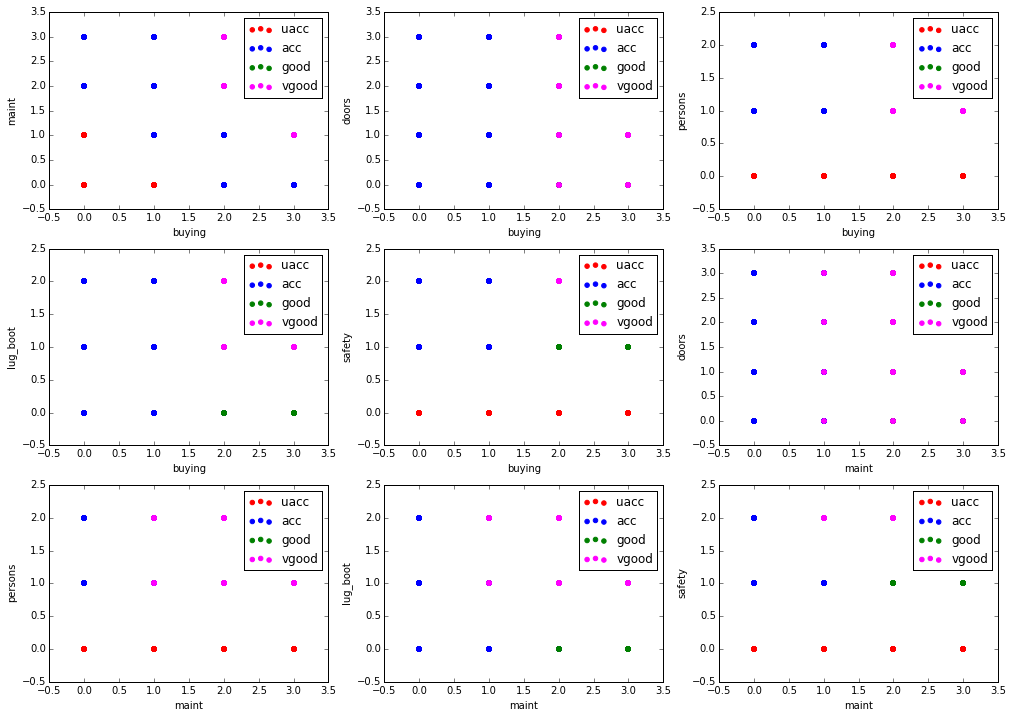

In [19]:
ax = []
fig = plt.figure(figsize=(17, 12))
for i in range(0,9):
    ax.append(fig.add_subplot(330 + (i+1)))
    
for i in range(0,9):
    uacc = ax[i].scatter(df_uacc[options[i]['data_x']], df_uacc[options[i]['data_y']], color='red')
    acc = ax[i].scatter(df_acc[options[i]['data_x']], df_acc[options[i]['data_y']], color='blue')
    good = ax[i].scatter(df_good[options[i]['data_x']], df_good[options[i]['data_y']], color='green')
    vgood = ax[i].scatter(df_vgood[options[i]['data_x']], df_vgood[options[i]['data_y']], color='magenta')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].legend((uacc, acc, good, vgood), ('uacc', 'acc', 'good', 'vgood'))

In [20]:
# 분석내용

# buying-maint 그래프: 구매가격 혹은 유지비 둘중 하나라도 0(vhigh)이면 만족도가 uacc, 유지비가 1(high)이어도 구매가격이 3(low)일때와 구매가격이 2(med)이고 유지비도 2(med) 이상이면 vgood, 그 외에 유지비가 2-3이고 구매가격이 0-1, 혹은 그 반대의 경우에는 만족도가 acc이다.

# buying-doors 그래프: 문의 개수와 관계 없이 구매가격이 0-1(vhigh-high)면 만족도가 acc, 2-3(med-low)면 vgood이다.

# buying-persons 그래프: 탑승인원이 0(2명)인 경우에는 만족도가 항상 uacc, 그 외의 경우에는 구매가격에 의해 만족도가 결정된다. 구매가격이 0-1(vhigh-high)면 만족도가 acc, 2-3(med-low)면 vgood.

# buying-lug_boot 그래프: 구매가격이 0-1(vhigh-high)인 경우 트렁크 크기에 관계없이 만족도가 acc이고, 구매가격 2-3의 경우에는 트렁크의 크기가 0(small)일때 good, 1-2(med-big)일때 vgood.

# buying-safety 그래프: 안전도가 0(low)일때는 항상 만족도가 uacc, 안전도가 1-2(med-high)이고 구매가격이 0-1(vhigh-high)일때 acc, 구매가격 2-3(med-low)일때는 안전도에 따라 1(med)는 good, 2(high)는 vgood.

# maint-doors 그래프: 문의 개수에 관계 없이 유지비가 0(vhigh)이면 acc, 1-3(high-low)이면 vgood.

# maint-persons 그래프: 탑승인원이 0(2명)인 경우 유지보수 가격이 낮아도 만족도가 uacc, 탑승인원 1(4명)이상부터 만족도가 올라가고, 유지보수 가격이 0(vhigh)일 경우 만족도 acc, 유지보수 가격이 1(high)이상일 경우 만족도는 vgood이 나타난다.

# maint-lug_boot 그래프: 유지비 0(vhigh)일때는 트렁크 크기에 관계없이 acc, 트렁크 크기가 0(small)이고 유지비가 1(high)이면 acc, 2-3(med-low)이면 good. 그 외 트렁크 크기가 1-2(med-big)이고 유지비 1(high) 이상이면 vgood.

# maint-safety 그래프: 안전도가 0(low)이면 유지비에 관계없이 uacc, 안전도가 1(med)일때 유지비에 따라 0-1(vhigh-high)이면 acc, 2-3(med-low)이면 good, 안전도가 2(high)일때 유지비 0(vhigh)면 good, 1-3(high-low)이면 vgood. 

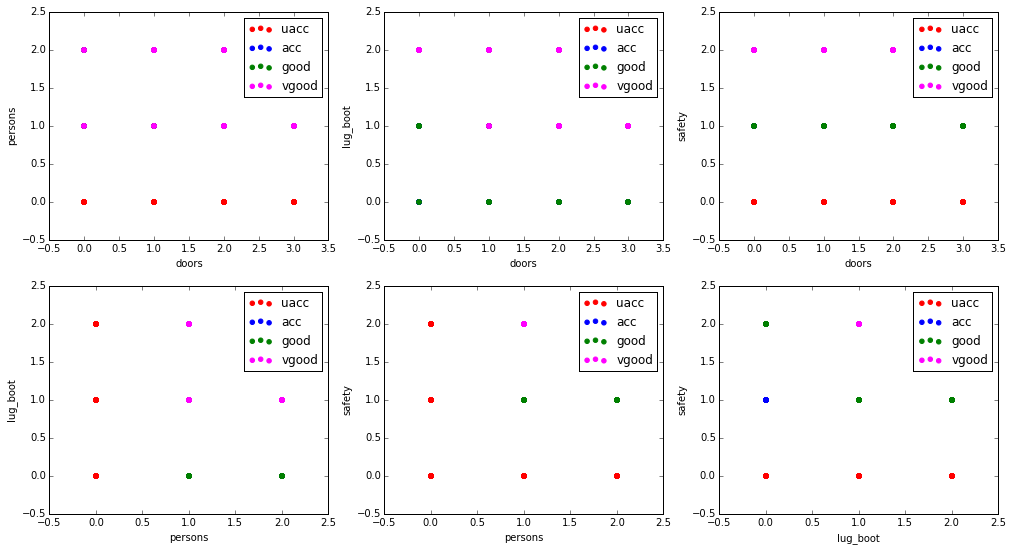

In [21]:
ax = []
fig = plt.figure(figsize=(17, 9))
for i in range(0,6):
    ax.append(fig.add_subplot(230 + (i+1)))
    
for i in range(0,6):
    uacc = ax[i].scatter(df_uacc[options[i+9]['data_x']], df_uacc[options[i+9]['data_y']], color='red')
    acc = ax[i].scatter(df_acc[options[i+9]['data_x']], df_acc[options[i+9]['data_y']], color='blue')
    good = ax[i].scatter(df_good[options[i+9]['data_x']], df_good[options[i+9]['data_y']], color='green')
    vgood = ax[i].scatter(df_vgood[options[i+9]['data_x']], df_vgood[options[i+9]['data_y']], color='magenta')
    ax[i].set_xlabel(options[i+9]['label_x'])
    ax[i].set_ylabel(options[i+9]['label_y'])
    ax[i].legend((uacc, acc, good, vgood), ('uacc', 'acc', 'good', 'vgood'))

In [22]:
# 분석내용

# doors-persons 그래프: 문의 개수에 관계없이, 탑승인원이 0(2명)이면 uacc, 1-2(4명이상)이면 vgood.

# doors-lug_boot 그래프: 트렁크의 크기가 0(small)이거나 1(med)일때 문의 개수가 0(2개)이면 good, 트렁크 크기가 1(med)이어도 문의 개수가 1-3(3개이상)이면 vgood, 트렁크의 크기가 2(big)이면 모두 vgood.

# doors-safety 그래프: 문의 개수에 관계없이 안전도 0(low)일때 만족도 uacc, 1(med)일때 good, 2(high)일때 vgood.

# persons-lug_boot 그래프: 탑승인원이 0(2명)일때는 트렁크 크기에 관계없이 항상 uacc, 탑승인원 1-2(4명이상)일때는 트렁크의 크기가 0(small)이면 good, 1-2(med-big)이면 vgood.

# persons-safety 그래프: 탑승인원 혹은 안전도가 둘중 하나라도 0(2명, low)면 항상 uacc, 그외에는 탑승인원에 관계없이 안전도가 1(med)이면 good, 2(high)면 vgood.

# lug_boot-safety 그래프: 안전도가 0(low)면 만족도는 항상 uacc, 트렁크 크기가 0이고 안전도가 1이면 acc, 안전도가 1일때 트렁크 크기가 1-2이거나, 트렁크 크기가 0이고 안전도가 2이면 good, 트렁크 크기가 1-2이고 안전도가 2이면 vgood.

# 15개 그래프 전체적인 분석: 가장 구분이 뚜렷한 그래프는 buying-doors, maint-doors, persons-doors, safety-doors로, 문의 개수가 평가만족도에 영향을 미치지 않는 다는 것을 알 수 있다. 또한 탑승인원이 0(2명)이거나 안전도가 0(low)인 경우에는 만족도가 항상 uacc임을 알 수 있다. 

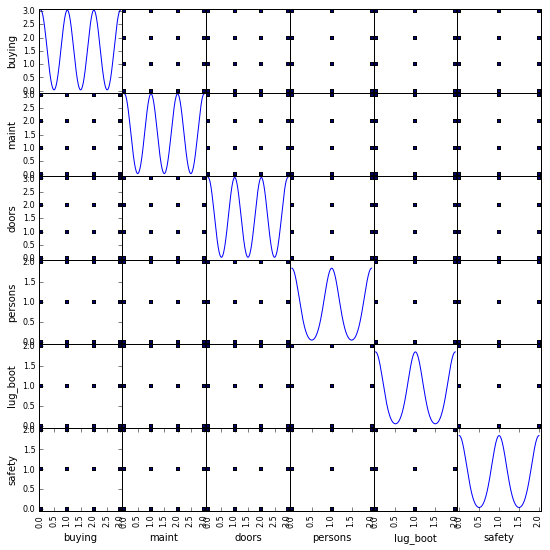

In [23]:
df2 = df.ix[:,0:6]

from pandas.tools.plotting import scatter_matrix

_ = scatter_matrix(df2, figsize=(9, 9), diagonal='kde')

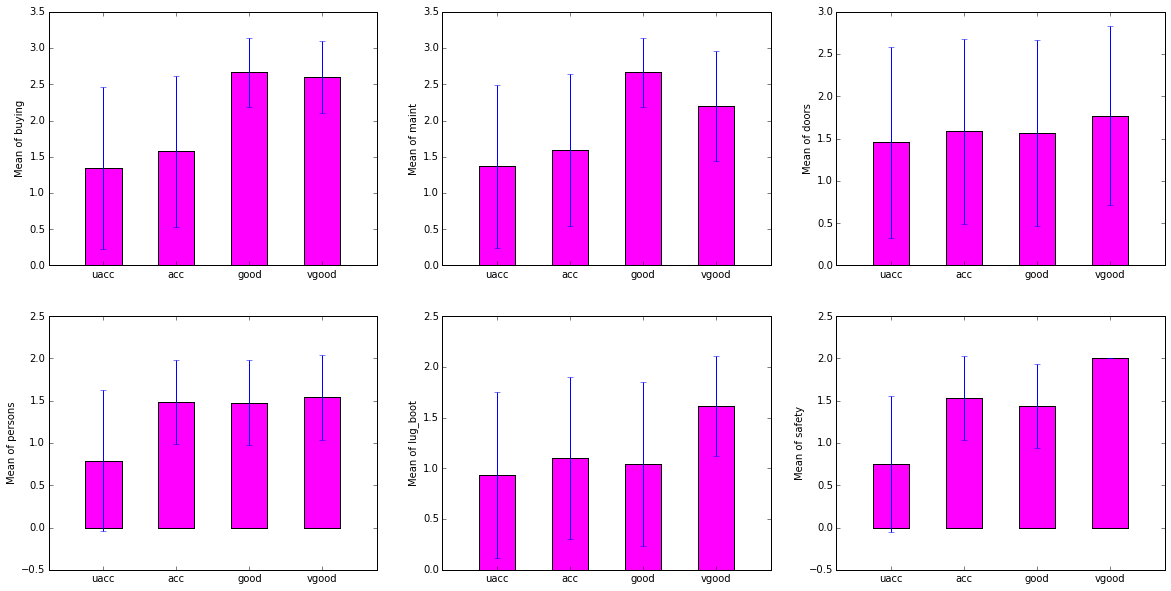

In [24]:
stats = {}
for i in range(0,6):
    stats[i] = {}
    stats[i]['mean'] = (df_uacc[feature_names[i]].mean(), 
                        df_acc[feature_names[i]].mean(), 
                        df_good[feature_names[i]].mean(),
                        df_vgood[feature_names[i]].mean())
    stats[i]['std'] = (df_uacc[feature_names[i]].std(), 
                       df_acc[feature_names[i]].std(), 
                       df_good[feature_names[i]].std(),
                       df_vgood[feature_names[i]].std())
    
ind = Series([0.5, 1.5, 2.5, 3.5])
width = 0.5
fig = plt.figure(figsize=(20, 10))
ay = []
for i in range(0,6):
    ay.append(fig.add_subplot(230 + (i+1)))
    
for i in range(0,6):
    ay[i].bar(ind, stats[i]['mean'], 0.5, color='magenta', yerr=stats[i]['std'])
    ay[i].set_xlim([0, 4.5])
    ay[i].set_ylabel('Mean of ' + feature_names[i])
    ay[i].set_xticks(ind + width/2)
    ay[i].set_xticklabels(['uacc', 'acc', 'good', 'vgood'])

In [25]:
# [Mission 4] 전체 데이터 집합에 대한 Entropy 산출

from collections import Counter
from math import log

def entropy(labels):
    """ Computes entropy of label distribution. """
    from collections import Counter
    from math import log
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.array(Counter(labels).values())
    probs = counts / float(n_labels)
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.

    # Compute standard entropy.
    for i in probs:
        ent -= i * log(i, n_classes)

    return ent

In [26]:
df['eval'].values

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [27]:
entropy(df['eval'].values)

0.60287048500608764

In [28]:
# [Mission 5] Decision Tree 모델 구축을 고려하여 루트노드에서 첫번째 Branch를 위한 IG가 가장 높은 속성 산출

df_per_attr = {}
for i in feature_names:
    df_per_attr[i] = {}
    groupby_df = df[['eval', i]].groupby(i)
    df_per_attr[i]['ngorups'] = groupby_df.ngroups
    df_per_attr[i]['group_keys'] = groupby_df.groups.keys()
    df_per_attr[i]['subgroups'] = {}
    for j in range(groupby_df.ngroups):
        df_per_attr[i]['subgroups'][j] = groupby_df.get_group(df_per_attr[i]['group_keys'][j])

In [29]:
df_per_attr['maint']['subgroups'][0]

,eval,maint
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [30]:
df_per_attr['maint']['subgroups'][2]

,eval,maint
216,0,2
217,0,2
218,0,2
219,0,2
220,0,2
221,0,2
222,0,2
223,0,2
224,0,2
225,0,2


In [31]:
parent_size = float(len(df))
parent_size

1728.0

In [32]:
sub_size = len(df_per_attr['buying']['subgroups'][1])
sub_size

432

In [33]:
for i in feature_names:
        sub_sum_entropy = 0.0
        print i
        for j in range(df_per_attr[i]['ngorups']):
            sub_size = len(df_per_attr[i]['subgroups'][j])
            sub_entropy = entropy([item[0] for item in df_per_attr[i]['subgroups'][j].values])
            print "%3.2f * %5.4f = %5.4f" % (sub_size / parent_size, sub_entropy, (sub_size / parent_size) * sub_entropy)
            sub_sum_entropy = sub_sum_entropy + (sub_size / parent_size) * sub_entropy
        ig = entropy(df['eval'].values) - sub_sum_entropy
        df_per_attr[i]['information_gain'] = ig
        print "Information Gain: %5.4f - %5.4f = %5.4f" % (entropy(df['eval'].values), sub_sum_entropy, ig)
        print

buying
0.25 * 0.6500 = 0.1625
0.25 * 0.8113 = 0.2028
0.25 * 0.7024 = 0.1756
0.25 * 0.7855 = 0.1964
Information Gain: 0.6029 - 0.7373 = -0.1344

maint
0.25 * 0.6500 = 0.1625
0.25 * 0.6200 = 0.1550
0.25 * 0.7024 = 0.1756
0.25 * 0.7453 = 0.1863
Information Gain: 0.6029 - 0.6794 = -0.0766

doors
0.25 * 0.5267 = 0.1317
0.25 * 0.6059 = 0.1515
0.25 * 0.6350 = 0.1587
0.25 * 0.6350 = 0.1587
Information Gain: 0.6029 - 0.6006 = 0.0022

persons
0.33 * 0.0000 = 0.0000
0.33 * 0.7404 = 0.2468
0.33 * 0.7388 = 0.2463
Information Gain: 0.6029 - 0.4930 = 0.1098

lug_boot
0.33 * 0.5679 = 0.1893
0.33 * 0.6280 = 0.2093
0.33 * 0.6856 = 0.2285
Information Gain: 0.6029 - 0.6271 = -0.0243

safety
0.33 * 0.0000 = 0.0000
0.33 * 0.7667 = 0.2556
0.33 * 0.8078 = 0.2693
Information Gain: 0.6029 - 0.5248 = 0.0781



In [34]:
import operator
information_gain_dict = {}
for i in feature_names:
    information_gain_dict[i] = df_per_attr[i]['information_gain']

information_gain_dict

{'buying': -0.13443808367862886,
 'doors': 0.002242858313316054,
 'lug_boot': -0.024277948325873711,
 'maint': -0.076564919618021809,
 'persons': 0.1098314816699541,
 'safety': 0.078058732848778067}

In [35]:
max(information_gain_dict.iteritems(), key=operator.itemgetter(1))

('persons', 0.1098314816699541)

In [36]:
# [Mission 6] sklearn 모듈을 활용하여 Decision Tree 모델을 구축하고 예측 시도

attributes = df.iloc[:, 0:6]
attributes

,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1
5,0,0,0,0,1,2
6,0,0,0,0,2,0
7,0,0,0,0,2,1
8,0,0,0,0,2,2
9,0,0,0,1,0,0


In [37]:
car_eval_data = attributes.values
car_eval_data

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       ..., 
       [3, 3, 3, 2, 2, 0],
       [3, 3, 3, 2, 2, 1],
       [3, 3, 3, 2, 2, 2]], dtype=int64)

In [38]:
target_series = df.iloc[:, 6]
target_series

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1698    0
1699    3
1700    2
1701    0
1702    0
1703    0
1704    0
1705    0
1706    0
1707    0
1708    0
1709    0
1710    0
1711    1
1712    3
1713    0
1714    3
1715    2
1716    0
1717    3
1718    2
1719    0
1720    1
1721    3
1722    0
1723    3
1724    2
1725    0
1726    3
1727    2
Name: eval, dtype: int64

In [39]:
car_eval_target = target_series.values
car_eval_target

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [40]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(car_eval_data, car_eval_target)

In [41]:
with open("car_evaluation.dot", 'w') as f2:
    tree.export_graphviz(clf, out_file=f2)

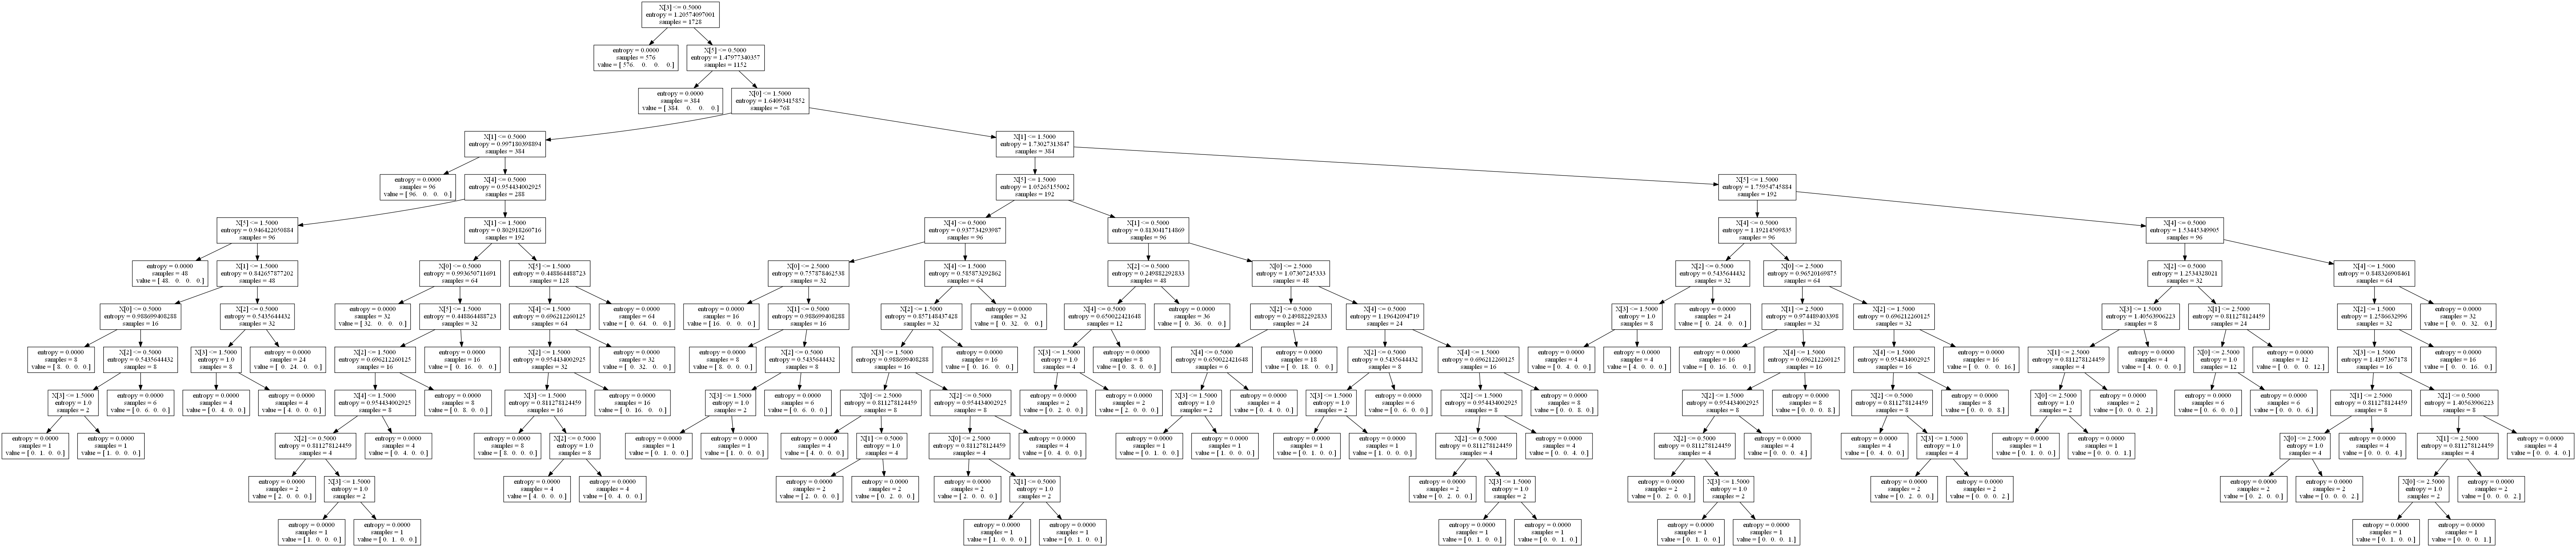

In [42]:
from IPython.display import Image
Image(filename='car_evaluation.png')

In [43]:
# 분석내용

# Mission5의 결과에서 첫번째 branch를 구성할 때 가장 적절한 속성은 'persons'임을 알 수 있다.
# Mission6에서 sklearn 모듈을 활용하여 구한 Decision Tree 모델의 첫번째 branch를 보면 X[3]속성('persons')을 사용했음을 알 수있다. X[3]속성이 0.5보다 작은 경우와 아닌경우로 나누었는데, scatter plot의 분석에서 탑승인원이 0일때 만족도가 항상 uacc였음을 미루어 보았을때, 0과 1의 중간값인 0.5로 만족도가 uacc인 경우와 acc이상인 경우로 나누었음을 알 수 있다. 또한 두번째 branch는 X[5]속성('safety')을 사용했는데 마찬가지로 안전도가 0인 경우 만족도가 항상 uacc였기 때문에 0과 1의 중간값인 0.5로 uacc인 경우와 acc이상인 경우를 나누었음을 알 수 있다. 이때, Mission5의 결과에서 구한 Information Gain이 가장 높은 속성이 'persons', 그 다음으로 'safety'였기 때문에 첫번째 branch에 사용된 속성이 'persons'가 되었음을 알 수 있다.

In [44]:
entropy(df['eval'].values)

0.60287048500608764

In [45]:
clf.predict(car_eval_data[-1])

array([2], dtype=int64)

In [46]:
for i in map_dic['eval'].keys() :
    if map_dic['eval'][i] == clf.predict(car_eval_data[-1]) :
        print i

vgood


In [47]:
# data를 예측하여 data가 속하는 속성을 반환하는 함수

def car_eval(predict_data) :
    
    #clf.predict(predict_data)
    
    for i in map_dic['eval'].keys() :
        if map_dic['eval'][i] == clf.predict(predict_data) :
            return i

In [48]:
# 기존 training data 예측

car_eval(car_eval_data[-1])

'vgood'

In [49]:
car_eval(car_eval_data[1699])

'good'

In [50]:
car_eval(car_eval_data[50])

'unacc'

In [51]:
car_eval(car_eval_data[1720])

'acc'

In [52]:
# 새로운 data 예측

car_eval([3,3,3,0,2,2])

'unacc'

In [53]:
car_eval([0,3,0,2,2,0])

'unacc'

In [54]:
car_eval([3,0,0,1,2,1])

'acc'

In [55]:
car_eval([1,1,1,2,1,1])

'acc'

In [56]:
car_eval([0,2,0,1,1,2])

'acc'

In [57]:
car_eval([2,3,0,1,0,2])

'good'

In [58]:
car_eval([3,3,3,2,1,2])

'vgood'